### Aim
To utilize logistic regression to predict lung cancer using a dataset of cancer
patients, conducting the analysis with Python. 

### About the Dataset
This dataset comprises lung cancer patient information includes the following
columns- age, gender, air pollution exposure, alcohol use, dust allergy, occupational
hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking status, passive smoker status, chest pain, coughing of blood, fatigue levels , weight loss , shortness of breath , wheezing , swallowing difficulty , clubbing of finger nails , frequent colds , dry coughs and snoring. By analyzing this data, we aim to understand the factors contributing to lung
cancer and optimize treatment strategies. 

### Libraries
This project utilised several Python libraries for data analysis, visualization, and
machine learning tasks. **Pandas** facilitated data manipulation and analysis, while
**NumPy** supported numerical computing. **Matplotlib** and **Seaborn** enabled the
creation of insightful visualizations. **Scikit-learn** provided machine learning
algorithms for tasks like predicting lung cancer using **Logistic Regression**. Its
metrics module allowed for the evaluation of model performance with metrics
like mean squared error, accuracy, classification report, and confusion matrix. Together, these libraries streamlined the project's workflow, from data
preprocessing to model evaluation.

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

/var/folders/s_/f1fgpnxx69568df2rt65812c0000gn/T/ipykernel_71390/3536187075.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df=pd.read_csv("/Users/sm/Downloads/cancer patient data sets.csv")

### Exploratory Data Analysis

In [5]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [7]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [8]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [9]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [10]:
df['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

### Data preprocessing

The following code maps the categorical values 'Low', 'Medium', and 'High' in the
'Level' column to numerical equivalents 1, 2, and 3, respectively.

In [11]:
d = {'Low': 1, 'Medium': 2, 'High': 3}
df['Level']= df['Level'].map(d)

By excluding the index and patientId columns, a heatmap is generated to depict
the correlation or association among the remaining variables in the dataset.

In [15]:
#removing two columns (patientId and index)
df=df[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level']]

In [16]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [18]:
import seaborn as sns
sns.set() #default Seaborn theme styling

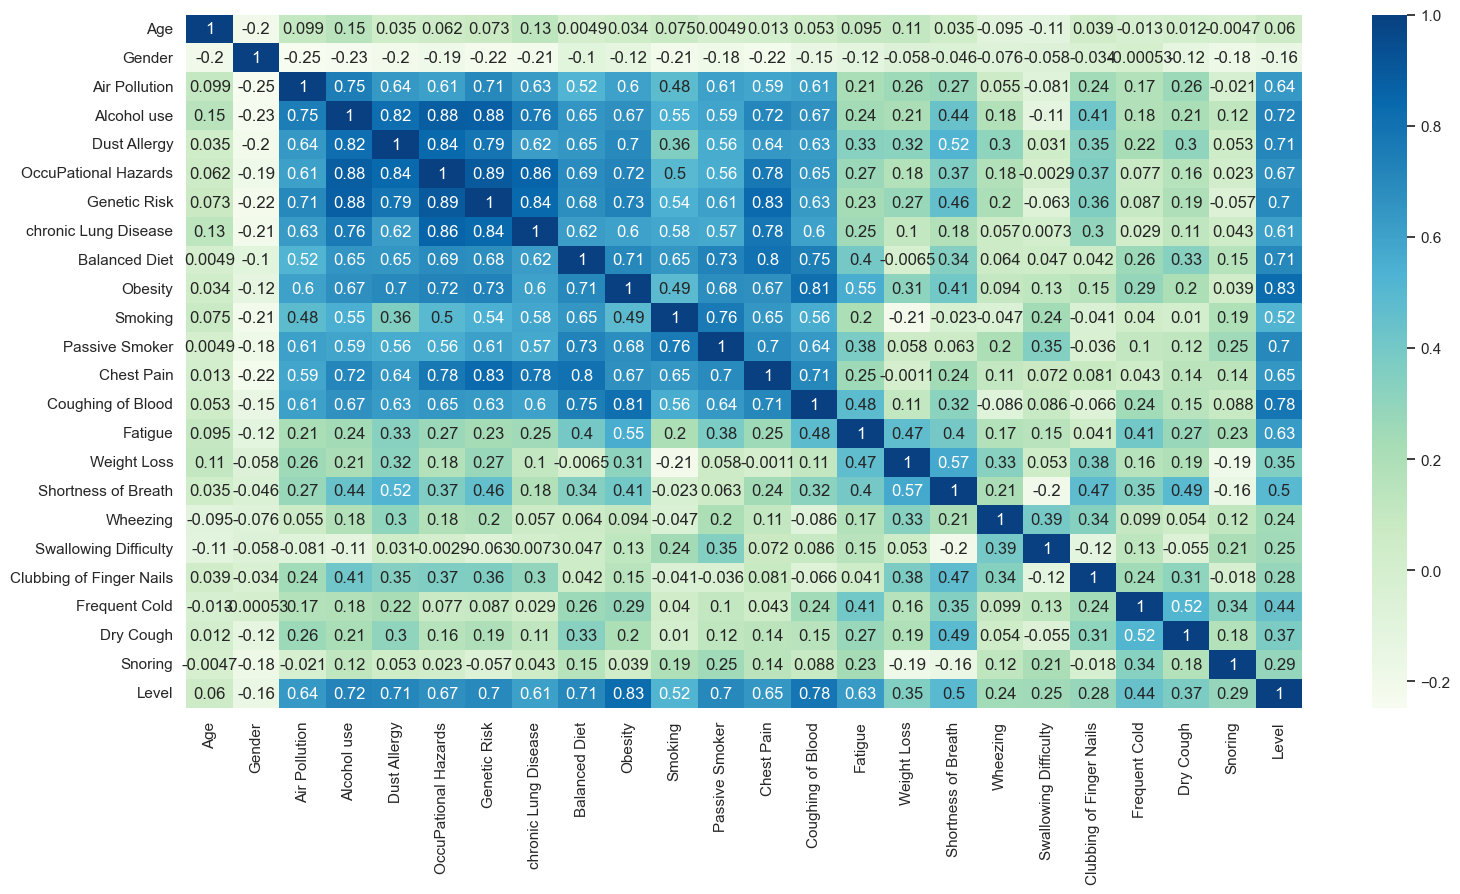

In [19]:
plt.figure(figsize = (18,9))
sns.heatmap(df.corr(), cmap='GnBu', annot=True)
plt.show()

In [20]:
df['Smoking'].corr(df['Passive Smoker']) #checking the correlation

0.7616215035339875

Visualizing the correlation between the "Level" column and other DataFrame
columns through a heatmap offers insights into their relationships' strength and
direction, aiding in the identification of relevant features/columns for analysis.

<Axes: >

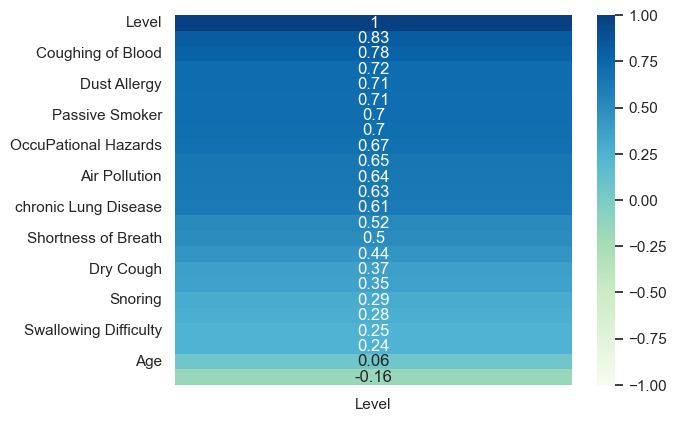

In [21]:
#focusing on the correlation between "Level" and other columns.
sns.heatmap(df.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='GnBu')


In [23]:
#dropping the columns -
 #'Smoking', 'Chest Pain', 'Weight Loss', 'Balanced Diet', 'Gender', 'Wheezing', 'Frequent Cold', 'Fatigue', 'Alcohol use', 'Obesity', 'Genetic Risk', 'Clubbing of Finger Nails'
df=df[['Age','Coughing of Blood','Dust Allergy','Passive Smoker','OccuPational Hazards','Air Pollution','chronic Lung Disease','Shortness of Breath','Dry Cough','Snoring','Swallowing Difficulty','Level']]

In [27]:
df.head()


,Age,Coughing of Blood,Dust Allergy,Passive Smoker,OccuPational Hazards,Air Pollution,chronic Lung Disease,Shortness of Breath,Dry Cough,Snoring,Swallowing Difficulty,Level
0,33,4,5,2,4,2,2,2,3,4,3,1
1,17,3,5,4,3,3,2,7,7,2,6,2
2,35,8,6,3,5,4,4,9,7,2,1,3
3,37,8,7,7,7,7,7,3,7,5,4,3
4,46,9,7,7,7,6,6,4,2,3,4,3


In [28]:
df.shape

(1000, 12)

### Applying Logistic Regression

'Level' will serve as the y/response variable, while the remaining variables will be
utilized as X/explanatory variables.

In [29]:
X=df.drop('Level',axis=1)

y=df['Level']

The dataset is divided into training and testing sets for the Logistic Regression
Model using a 70/30 split ratio, with 70% of the data allocated for training
(X_train and y_train) and 30% for testing (X_test and y_test).

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(solver='liblinear')
Classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [39]:
y_train_predict = Classifier.predict(X_train)

print(accuracy_score(y_train,y_train_predict))

0.9257142857142857


In [40]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_train_predict)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.07428571428571429


The model's accuracy and mean squared error are evaluated on the training data, with the accuracy score indicating the proportion of correctly predicted labels, and mean squared error measuring the average squared difference between the
predicted and actual values.

In [33]:
y_test_predict = Classifier.predict(X_test)

In [38]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_predict})
Results.head(10)

,Actual,Predictions
507,2,2
818,1,1
452,2,1
368,1,1
242,3,3
929,1,1
262,1,1
810,1,2
318,3,3
49,1,1


In [35]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_predict)
print("Accuracy:", accuracy)


Accuracy: 0.9033333333333333


In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_predict)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.09666666666666666


The model's predictions and actual values on the test set are compared and
presented in a DataFrame for the first 10 samples. Subsequently, accuracy and
mean squared error metrics are computed to assess the model's predictive
performance on unseen data.

In [51]:
#tocalculates the predicted probabilities for each class label for the samples in the test dataset
y_test_predict_prob = Classifier.predict_proba(X_test)

#print the no of rows and columns
print(y_test_predict_prob.shape)

(300, 3)


In [53]:
y_test_predict_prob[0:5,:]

array([[1.93069478e-01, 8.06286862e-01, 6.43659955e-04],
       [9.03337593e-01, 6.61193350e-02, 3.05430715e-02],
       [5.87059641e-01, 2.37313813e-02, 3.89208977e-01],
       [8.69352588e-01, 9.92307128e-04, 1.29655104e-01],
       [1.73870178e-03, 1.61333520e-01, 8.36927778e-01]])

In [58]:
# Given array in scientific notation
array_in_scientific = y_test_predict_prob[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)



[['0.1930694776902440' '0.8062868623550727' '0.0006436599546833']
 ['0.9033375934655163' '0.0661193350101482' '0.0305430715243355']
 ['0.5870596412396241' '0.0237313813401456' '0.3892089774202304']
 ['0.8693525884813179' '0.0009923071280100' '0.1296551043906721']
 ['0.0017387017811842' '0.1613335198563036' '0.8369277783625122']]


In [60]:
# Compare the predicted values with the actuals along with the predicted probability that the class is "M".

pls = y_test_predict_prob[:,1]

Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat,'Prob(Class = 3)':pls})

Results.head(5)

,Actual,Predictions,Prob(Class = 3)
507,2,2,0.806287
818,1,1,0.066119
452,2,1,0.023731
368,1,1,0.000992
242,3,3,0.161334


Printing the predicted probabilities for the first five samples in the test dataset, it
was observed that they are represented in scientific notation, which were
converted to a normal number format with sixteen decimal points for better
readability. Subsequently, the predicted values are compared with the actual
values.

### Model evaluation

In [61]:

print("Training Accuracy:", accuracy_score(y_train, y_train_predict))
print("Testing Accuracy:", accuracy_score(y_test, y_test_predict))

Training Accuracy: 0.9257142857142857
Testing Accuracy: 0.9033333333333333


In [62]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_test_predict))

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.80      0.85        89
           2       0.83      0.89      0.85        96
           3       0.97      1.00      0.98       115

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.90       300
weighted avg       0.90      0.90      0.90       300



### Interpretation:
The model achieves a training accuracy of 92.57% and a testing accuracy of
90.33%. The classification report provides precision, recall, and F1-score for each
class label, indicating high performance with F1-scores ranging from 0.85 to 0.98.

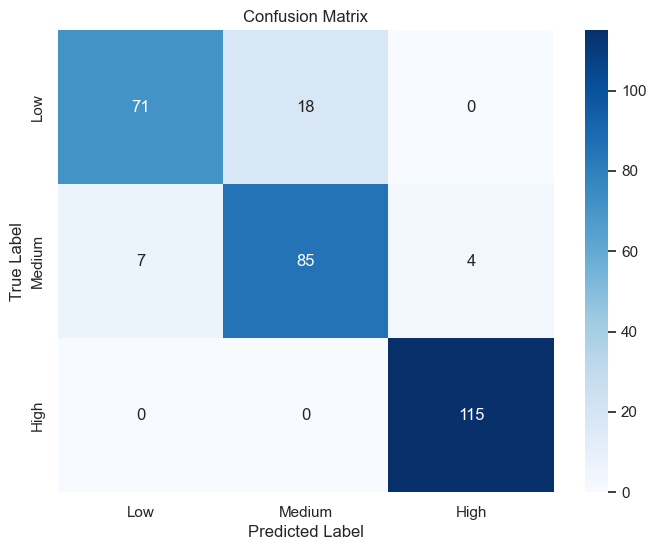

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_predict)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'], 
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interpretation
The confusion matrix indicates the model's performance in predicting the classes.
 - The entry in the first row and first column (71) represents the number of true
negatives (TN), where the model correctly predicted the class as 'Low' when it
was actually 'Low'.
 - The entry in the second row and second column (85) represents the number of
true positives (TP), where the model correctly predicted the class as 'Medium' when it was actually 'Medium'.
 - The entry in the third row and third column (115) represents the number of true
positives (TP), where the model correctly predicted the class as 'High' when it was
actually 'High'. 

#### Additionally: 
- The entry in the first row and second column (18) represents false positives (FP), where the model incorrectly predicted the class as 'Medium' when it was actually
'Low'. 
- The entry in the second row and first column (7) represents false negatives (FN), where the model incorrectly predicted the class as 'Low' when it was actually
'Medium'. 
- The entry in the second row and third column (4) represents false positives (FP), where the model incorrectly predicted the class as 'High' when it was actually
'Medium'.

### Conclusion
The logistic regression model exhibits a promising performance in predicting the
severity of lung cancer. The confusion matrix reveals that the model effectively
distinguishes between 'High' severity cases, achieving a high true positive rate. However, there is a notable number of false predictions observed between 'Low' and 'Medium' severity levels, indicating potential challenges in accurately
classifying cases with intermediate severity. This suggests a need for further
exploration into feature selection, model tuning, or potentially employing more
sophisticated algorithms to enhance predictive accuracy. Despite these
limitations, the model demonstrates considerable utility in aiding healthcare
professionals in early detection and risk assessment for lung cancer patients. Continued refinement and validation of the model through additional data and
validation studies would be beneficial to ensure its reliability and effectiveness in
clinical practice.